# Exploratory Data Analysis (EDA) on Vibration Data

In this notebook, we will perform exploratory data analysis on the vibration dataset of main journal bearings in internal combustion engines. The goal is to understand the data, visualize key features, and derive insights that can help in predictive maintenance.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')

In [8]:
import zipfile
from io import BytesIO
import pandas as pd
import re
from pathlib import Path

def parse_vibrations_zip(zip_path):
    """
    Parse vibrations.zip and extract all CSV data with metadata.
    
    Returns a DataFrame with vibration data and extracted metadata 
    (bearing condition, RPM, humidity, temperature).
    """
    all_data = []
    
    with zipfile.ZipFile(zip_path, 'r') as main_zip:
        for nested_name in main_zip.namelist():
            if not nested_name.endswith('.zip'):
                continue
                
            nested_data = BytesIO(main_zip.read(nested_name))
            
            with zipfile.ZipFile(nested_data, 'r') as nested_zip:
                for file_name in nested_zip.namelist():
                    if not file_name.endswith('.csv'):
                        continue
                    
                    # Extract metadata from path
                    path_parts = file_name.split('/')
                    
                    # Parse condition (Faulty/Healthy)
                    condition = 'faulty' if 'Faulty' in file_name else 'healthy'
                    
                    # Parse RPM
                    rpm_match = re.search(r'(\d+)\s*RPM', file_name)
                    rpm = int(rpm_match.group(1)) if rpm_match else None
                    
                    # Parse humidity
                    humidity_match = re.search(r'(\d+)%?\s*Humidity', file_name)
                    humidity = int(humidity_match.group(1)) if humidity_match else None
                    
                    # Parse temperature
                    temp_match = re.search(r'(-?\d+)\s*deg\s*Celsius', file_name)
                    temperature = int(temp_match.group(1)) if temp_match else None
                    
                    # Read CSV
                    try:
                        df = pd.read_csv(nested_zip.open(file_name))
                        df['condition'] = condition
                        df['rpm'] = rpm
                        df['humidity'] = humidity
                        df['temperature'] = temperature
                        df['source_file'] = file_name.split('/')[-1]
                        all_data.append(df)
                    except Exception as e:
                        print(f"Error reading {file_name}: {e}")
    
    return pd.concat(all_data, ignore_index=True) if all_data else pd.DataFrame()

In [9]:
zip_path = "../vibrations.zip"
df = parse_vibrations_zip(zip_path)

print(f"Total records: {len(df):,}")
print(f"Columns: {list(df.columns)}")
print(f"\nCondition distribution:\n{df['condition'].value_counts()}")
print(f"\nRPM values: {df['rpm'].unique()}")
print(f"Temperature range: {df['temperature'].min()}°C to {df['temperature'].max()}°C")
print(f"Humidity values: {df['humidity'].unique()}")

Total records: 390,263
Columns: ['Time', 'Demand 1', 'Control 1', 'Output Drive 1', 'Channel 1', 'Channel 2', 'Channel 3', 'Channel 4', 'Channel 1 Kurtosis', 'Channel 2 Kurtosis', 'Channel 3 Kurtosis', 'Channel 4 Kurtosis', 'Rear Input 1', 'Rear Input 2', 'Rear Input 3', 'Rear Input 4', 'Rear Input 5', 'Rear Input 6', 'Rear Input 7', 'Rear Input 8', 'condition', 'rpm', 'humidity', 'temperature', 'source_file']

Condition distribution:
condition
faulty     209662
healthy    180601
Name: count, dtype: int64

RPM values: [1000 1500 2000]
Temperature range: -10°C to 45°C
Humidity values: [  0 100  50]


<Axes: title={'center': 'Bearing Condition Distribution'}, xlabel='condition'>

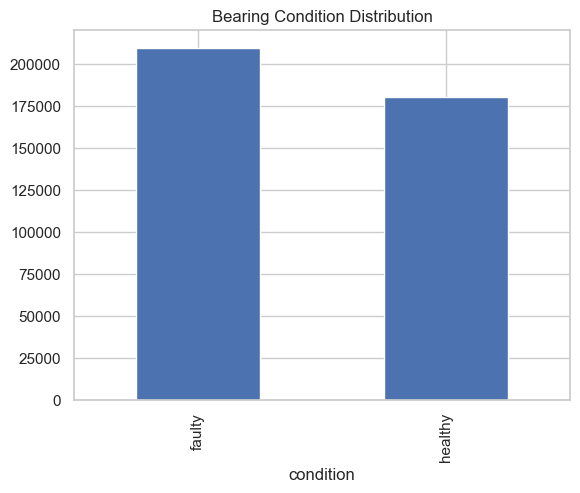

In [14]:
df.condition.value_counts().plot(kind='bar', title='Bearing Condition Distribution')

## Insights

In this section, we will summarize the insights derived from the exploratory data analysis, including any patterns observed in the data and potential features for model training.